<a href="https://colab.research.google.com/github/Vince501/ML-tasks/blob/task-3/Feature_Selection_%26_Regression_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn import metrics

### **Data Cleaning**

#### Get the Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Housing Pricing.csv')

In [ ]:
# size of the dataset
data.shape

(1460, 77)

In [ ]:
# get the first five rows of the dataset
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# remove the id column (starts from 1)
data.drop('Id',inplace=True,axis=1)
data.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500


In [ ]:
# assing name of features (columns) to a variable -  orignial features
original_features = list(data.columns)
original_features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch

In [ ]:
# checks for missing values columnwise
features_missing=list(data.columns[data.isna().any()])
len(features_missing)

15

#### Fill in missing features

In [ ]:
mean_fill,bfill=[],[]

In [ ]:
""" Loops through the misisng features
    - if feature is a float append to mean_fill
    - else append to bfill
"""
for feature in features_missing:
  print (feature,'',data[feature].isna().sum()/len(data)*100,' ',data[feature].dtype)
  if data[feature].dtype == 'float64':
    mean_fill.append(feature)
  else:
    bfill.append(feature)

LotFrontage  17.73972602739726   float64
MasVnrType  0.547945205479452   object
MasVnrArea  0.547945205479452   float64
BsmtQual  2.5342465753424657   object
BsmtCond  2.5342465753424657   object
BsmtExposure  2.6027397260273974   object
BsmtFinType1  2.5342465753424657   object
BsmtFinType2  2.6027397260273974   object
Electrical  0.0684931506849315   object
FireplaceQu  47.26027397260274   object
GarageType  5.5479452054794525   object
GarageYrBlt  5.5479452054794525   float64
GarageFinish  5.5479452054794525   object
GarageQual  5.5479452054794525   object
GarageCond  5.5479452054794525   object


In [ ]:
bfill

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
# in mean_fill replace missing feature with the mean

for feature in mean_fill:
    data[feature].fillna(data[feature].mean(),inplace=True)

In [ ]:
""" in bfill replace missing feature using bfill method i.e backward fill
    - this method fills the missing feature with the value of the succeding feature
"""

for feature in bfill:
    data[feature].fillna(method='bfill',inplace=True)

In [ ]:
# ffill() is applied across the index then any missing value is filled based on the corresponding value in the previous row
data['FireplaceQu'].fillna(method='ffill',inplace=True)

#### Summary: 
*   *The necessary libraries have been imported*
*   *The dataset  has 1460 rows and 77 columns*
*   *All missing features have been filled*





# **ENCODE THE DATASET**




In [ ]:
# construct a list for categorical features
categorical_features=list(data.select_dtypes(include=['object']).columns)
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
# deduce a list of numerical features from the original features excluding categorical features
numerical_list = list(set(original_features)-set(categorical_features))
numerical_list

['LotFrontage',
 'OverallCond',
 'GrLivArea',
 'BsmtUnfSF',
 'BsmtFullBath',
 'OpenPorchSF',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'SalePrice',
 'BedroomAbvGr',
 'GarageCars',
 'MoSold',
 'Fireplaces',
 'GarageYrBlt',
 'BsmtHalfBath',
 'YrSold',
 'HalfBath',
 'OverallQual',
 'KitchenAbvGr',
 'YearRemodAdd',
 'ScreenPorch',
 'MiscVal',
 'YearBuilt',
 'TotalBsmtSF',
 'WoodDeckSF',
 'MasVnrArea',
 'GarageArea',
 'LotArea',
 '1stFlrSF',
 'FullBath',
 'LowQualFinSF',
 'TotRmsAbvGrd',
 'MSSubClass',
 '2ndFlrSF',
 'PoolArea',
 'EnclosedPorch']

In [ ]:
# define norminal data and ordinal data that will be the base of encoding
norminal=['MSZoning','LandContour','Neighborhood']
ordinal=list(set(categorical_features)-set(norminal))
ordinal

['HeatingQC',
 'BsmtFinType1',
 'GarageFinish',
 'Condition2',
 'Exterior1st',
 'BldgType',
 'RoofStyle',
 'HouseStyle',
 'SaleCondition',
 'LandSlope',
 'LotConfig',
 'Foundation',
 'Functional',
 'Electrical',
 'PavedDrive',
 'ExterQual',
 'SaleType',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'BsmtCond',
 'RoofMatl',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageCond',
 'GarageType',
 'Utilities',
 'Heating',
 'LotShape',
 'GarageQual',
 'KitchenQual',
 'Exterior2nd',
 'ExterCond',
 'BsmtExposure',
 'Street',
 'MasVnrType']

In [ ]:
# define the target
target=['SalePrice']

In [ ]:
# get_dummies() is used for data manipulation; converts categorical data into dummy or indicator variables (0s or 1s)
df_nominal=pd.get_dummies(data[norminal])
df_nominal.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
for feature in ordinal:
  data[feature]=data[feature].astype('category').cat.codes
df_ordinal=data[ordinal]

In [ ]:
df_ordinal

,HeatingQC,BsmtFinType1,GarageFinish,Condition2,Exterior1st,BldgType,RoofStyle,HouseStyle,SaleCondition,LandSlope,LotConfig,Foundation,Functional,Electrical,PavedDrive,ExterQual,SaleType,BsmtQual,CentralAir,Condition1,BsmtCond,RoofMatl,BsmtFinType2,FireplaceQu,GarageCond,GarageType,Utilities,Heating,LotShape,GarageQual,KitchenQual,Exterior2nd,ExterCond,BsmtExposure,Street,MasVnrType
0,0,2,1,2,12,0,1,5,4,0,4,2,6,4,2,2,8,2,1,2,3,1,5,4,4,1,0,1,3,4,2,13,4,3,1,1
1,0,0,1,2,8,0,1,2,4,0,2,1,6,4,2,3,8,2,1,1,3,1,5,4,4,1,0,1,3,4,3,8,4,1,1,2
2,0,2,1,2,12,0,1,5,4,0,4,2,6,4,2,2,8,2,1,2,3,1,5,4,4,1,0,1,0,4,2,13,4,2,1,1
3,2,0,2,2,13,0,1,5,0,0,0,0,6,4,2,3,8,3,1,2,1,1,5,2,4,5,0,1,0,4,2,15,4,3,1,2
4,0,2,1,2,12,0,1,5,4,0,2,2,6,4,2,2,8,2,1,2,3,1,5,4,4,1,0,1,0,4,2,13,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,5,1,2,12,0,1,5,4,0,4,2,6,4,2,3,8,2,1,2,3,1,5,4,4,1,0,1,3,4,3,13,4,3,1,2
1456,4,0,2,2,9,0,1,2,4,0,4,1,2,4,2,3,8,2,1,2,3,1,4,4,4,1,0,1,3,4,3,10,4,3,1,3
1457,0,2,1,2,5,0,1,5,4,0,4,4,6,4,2,0,8,3,1,2,1,1,5,2,4,1,0,1,3,4,2,5,2,3,1,2
1458,2,2,2,2,8,0,3,2,4,0,4,1,6,0,2,3,8,3,1,2,3,1,4,2,4,1,0,1,3,4,2,8,4,2,1,2


In [ ]:
data[numerical_list]

,LotFrontage,OverallCond,GrLivArea,BsmtUnfSF,BsmtFullBath,OpenPorchSF,3SsnPorch,BsmtFinSF2,BsmtFinSF1,SalePrice,BedroomAbvGr,GarageCars,MoSold,Fireplaces,GarageYrBlt,BsmtHalfBath,YrSold,HalfBath,OverallQual,KitchenAbvGr,YearRemodAdd,ScreenPorch,MiscVal,YearBuilt,TotalBsmtSF,WoodDeckSF,MasVnrArea,GarageArea,LotArea,1stFlrSF,FullBath,LowQualFinSF,TotRmsAbvGrd,MSSubClass,2ndFlrSF,PoolArea,EnclosedPorch
0,65.0,5,1710,150,1,61,0,0,706,208500,3,2,2,0,2003.0,0,2008,1,7,1,2003,0,0,2003,856,0,196.0,548,8450,856,2,0,8,60,854,0,0
1,80.0,8,1262,284,0,0,0,0,978,181500,3,2,5,1,1976.0,1,2007,0,6,1,1976,0,0,1976,1262,298,0.0,460,9600,1262,2,0,6,20,0,0,0
2,68.0,5,1786,434,1,42,0,0,486,223500,3,2,9,1,2001.0,0,2008,1,7,1,2002,0,0,2001,920,0,162.0,608,11250,920,2,0,6,60,866,0,0
3,60.0,5,1717,540,1,35,0,0,216,140000,3,3,2,1,1998.0,0,2006,0,7,1,1970,0,0,1915,756,0,0.0,642,9550,961,1,0,7,70,756,0,272
4,84.0,5,2198,490,1,84,0,0,655,250000,4,3,12,1,2000.0,0,2008,1,8,1,2000,0,0,2000,1145,192,350.0,836,14260,1145,2,0,9,60,1053,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,5,1647,953,0,40,0,0,0,175000,3,2,8,1,1999.0,0,2007,1,6,1,2000,0,0,1999,953,0,0.0,460,7917,953,2,0,7,60,694,0,0
1456,85.0,6,2073,589,1,0,0,163,790,210000,3,2,2,2,1978.0,0,2010,0,6,1,1988,0,0,1978,1542,349,119.0,500,13175,2073,2,0,7,20,0,0,0
1457,66.0,9,2340,877,0,60,0,0,275,266500,4,1,5,2,1941.0,0,2010,0,7,1,2006,0,2500,1941,1152,0,0.0,252,9042,1188,2,0,9,70,1152,0,0
1458,68.0,6,1078,0,1,0,0,1029,49,142125,2,1,4,0,1950.0,0,2010,0,5,1,1996,0,0,1950,1078,366,0.0,240,9717,1078,1,0,5,20,0,0,112


In [ ]:
# concatenate all encoded dataframes into one to form a new dataset
new_data=pd.concat([df_nominal,df_nominal,data[numerical_list]],axis=1)

In [ ]:
new_data.shape

(1460, 105)

# **Standardize**

In [ ]:
# remove the target
new_data.drop('SalePrice',axis=1,inplace=True)

In [ ]:
# assing the numpy array of the new_data as the features
X=new_data.to_numpy()
X[6]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 7.5000e+01, 5.0000e+00,
       1.6940e+03, 3.1700e+02, 1.0000e+00, 5.7000e+01, 0.0000e

In [ ]:
# scale each feature to the unit variance
X=StandardScaler().fit_transform(X)
X

array([[-0.08304548, -0.21585871, -0.10526316, ...,  1.16185159,
        -0.06869175, -0.3593249 ],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.79516323,
        -0.06869175, -0.3593249 ],
       [-0.08304548, -0.21585871, -0.10526316, ...,  1.18935062,
        -0.06869175, -0.3593249 ],
       ...,
       [-0.08304548, -0.21585871, -0.10526316, ...,  1.84474434,
        -0.06869175, -0.3593249 ],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.79516323,
        -0.06869175,  1.47378925],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.79516323,
        -0.06869175, -0.3593249 ]])

In [ ]:
data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
# convert target to a numpy arr
y=data[target].to_numpy()
print(y.shape)
print(y)

(1460, 1)
[[208500]
 [181500]
 [223500]
 ...
 [266500]
 [142125]
 [147500]]


# **Feature Selection Using L1**

In [ ]:
""" Using the L1: Lasso regression; feature selection is done in order to use meaningful features in training the model
    NB : original features are retained """
lsvc = LinearSVC(C=0.02, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1460, 23)

**Spliting the dataset**

In [ ]:
# split the data set into train set and test set
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3)

In [ ]:
X_train.shape

(1022, 23)

# **Training the Dataset using Deep Feed Forward ANN**

In [ ]:
""" use 24 neurons at the input layer because the number of features
    output layer has only one neuron as there is only one output
    activation fn : relu ; doest not apply to the last layer - this is a linear regression problem.
    optimizer :  Adam
    loss fn : Mean Squared Error (mse)
    learning rate : 0.01
    epochs : 200
    batch size : 128
    """
epochs=200
model = Sequential()
model.add(Dense(24, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(Adam(learning_rate=0.01), loss="mse")

history = model.fit(X_train, y_train, validation_split=0.15,batch_size=128, epochs=epochs)

Epoch 1/200
7/7 [==============================] - 1s 47ms/step - loss: 38451942912.0000 - val_loss: 43602927616.0000
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 38337064448.0000 - val_loss: 43600408576.0000
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 38010882560.0000 - val_loss: 43594006528.0000
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 39619745792.0000 - val_loss: 43579052032.0000
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 39021248512.0000 - val_loss: 43546849280.0000
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 37694752768.0000 - val_loss: 43482472448.0000
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 37692165120.0000 - val_loss: 43361976320.0000
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 40722713600.0000 - val_loss: 43150630912.0000
Epoch 9/200
7/7 [==============================] - 0s 6ms/step 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 24)                576       
_________________________________________________________________
dense_5 (Dense)              (None, 14)                350       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 1,055
Trainable params: 1,055
Non-trainable params: 0
_________________________________________________________________


#### Plot the train loss vs the validation(test) loss

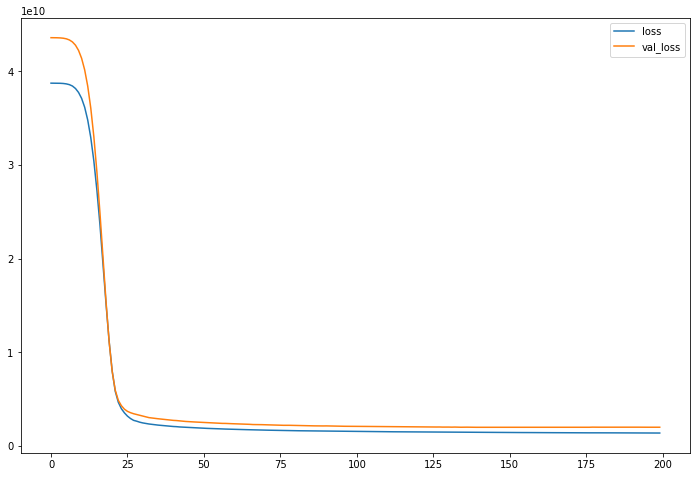

In [ ]:

historydf=pd.DataFrame(history.history, index=history.epoch)
historydf.plot(figsize=(12,8))

In [ ]:
historydf

# **Testing the Model**

In [ ]:
y_test[10]

array([108000])

In [ ]:
y_predicted=model.predict(X_test)
print(y_predicted[10])


[120146.945]


In [ ]:
print("MSE",metrics.mean_squared_error(y_test,y_predicted))
print("MAE",metrics.mean_absolute_error(y_test,y_predicted))

MSE 1901649161.7303567
MAE 28927.869559788815


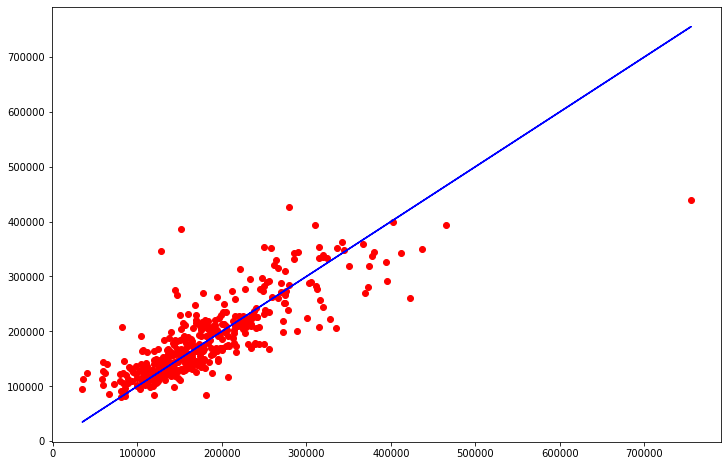

In [ ]:
fig=plt.figure(figsize=(12,8))
plt.scatter(y_test,y_predicted,c='r')
# Perfect predictions
plt.plot(y_test,y_test,'b')